## 中心极限定理
高斯分布，也称为正态分布，广泛应用于连续型随机变量分布的模型中。
对于一元变量x的情形，高斯分布可以写成如下的形式：
$$\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{1/2}}exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$$
其中$\mu$是均值，$\sigma^2$是方差。

对于D维向量$\textbf{x}$，多元高斯分布的形式为：
$$\mathcal{N}(\textbf{x}|\textbf{$\mu$},\Sigma)=\frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp\{-\frac{1}{2}(\textbf{x}-\textbf{$\mu$})^T\Sigma^{-1}(\textbf{x}-\textbf{$\mu$})\}$$
其中，$\textbf{$\mu$}$是一个D维均值向量，$\Sigma$是一个D*D的协方差矩阵，$|\Sigma|$是$\Sigma$的行列式。

高斯分布有着优良的性质，便于推导，很多时候会得到解析解。 一元高斯分布是个钟形癿曲线，大部分都集中在均值附近，朝两边癿概率呈指数衰减，这个可以用契比雪夫不等式来说明，偏离均值超过3个标准差的概率就非常低。

## 1. 拉普拉斯中心极限定理

拉普拉斯提出的中心极限定理（central limit theorem）告诉我们，对于某些温和的情况，一组随机变量之和（当然也是随机变量）的概率分布随着和式中项的数量的增加而逐渐趋向高斯分布。

**下面的代码说明，多个均匀分布之和的均值的概率分布，随着N的增加，分布趋向于高斯分布**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm as norm_dist

In [3]:
def uniform_central_limit(n, length):
    """
    @param:
    n:计算rv的n次平均值, length：平均随机变量的样本数
    @return:
    rv_mean: 长度为length的数组，它是平均随机变量的样本
    gaussian: 对data进行拟合所得到的高斯分布
    """
    rv_mean = np.zeros(length)
    for i in range(n):
        rv = uniform.rvs(size=length)
        rv_mean = rv_mean + rv
    rv_mean = rv_mean / n
    gaussian_params = norm_dist.fit(rv_mean)
    gaussian = norm_dist(gaussian_params[0], gaussian_params[1])
    return rv_mean, gaussian

K:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


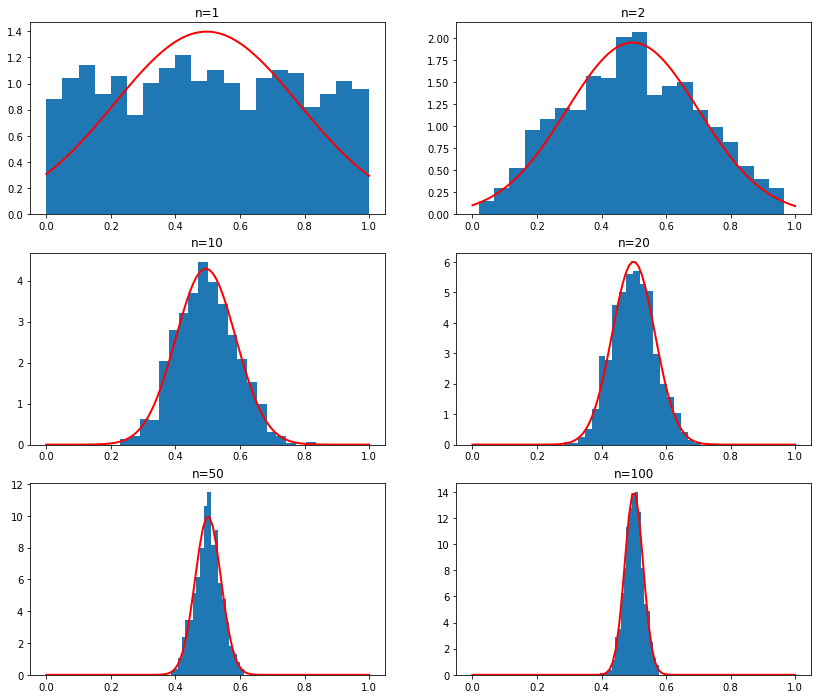

In [4]:
fig = plt.figure(figsize=(14,12))
x = np.linspace(0,1,100)
for i, n in enumerate([1,2,10,20,50,100]):
    ax = fig.add_subplot(3,2,i+1)
    data, gaussian = uniform_central_limit(n, 1000)
    ax.hist(data, bins=20, normed=True)
    plt.plot(x, gaussian.pdf(x), "r", lw=2)
    plt.title("n=%d" % n)
    
plt.show()